In [1]:
from datetime import date, timedelta
from constants import *
from bars import plot_bars as plot_areas, unique_people_tested
from phe import *
from phe import map_data as phe_map_data, latest_changes
from zoe import latest_map_data as zoe_map_data
from plotting import *
from vaccination import vaccination_dashboard, vaccination_changes
for_date = '*'

In [2]:
latest_changes(s.new_cases_sum, s.new_admissions_sum, s.new_deaths_sum)

Latest for England:
1,918 cases (7 day average) as of Sat 17 Apr, -79.4 since Fri 16 Apr
134 hospitalised (7 day average) as of Mon 19 Apr, -5.0 since Sun 18 Apr
16 died (7 day average) as of Sat 17 Apr, -0.3 since Fri 16 Apr


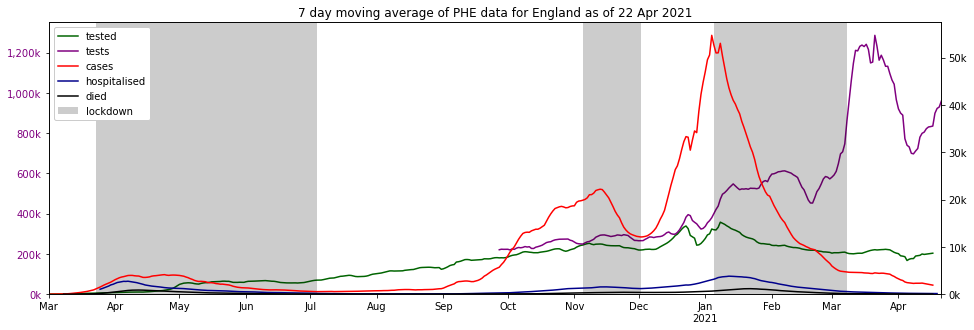

In [3]:
plot_summary(left_series=(s.unique_people_tested_sum, s.new_virus_tests_sum),
             right_series=(s.new_cases_sum, s.new_admissions_sum, s.new_deaths_sum))

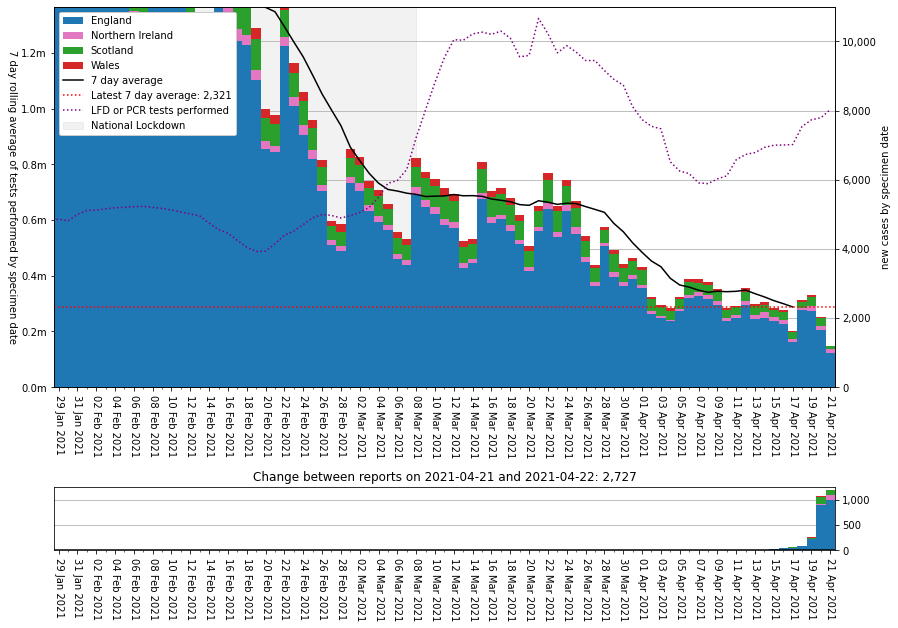

In [4]:
plot_areas(for_date, 'cases_nations', ylim=11_000, earliest='2021-01-29')

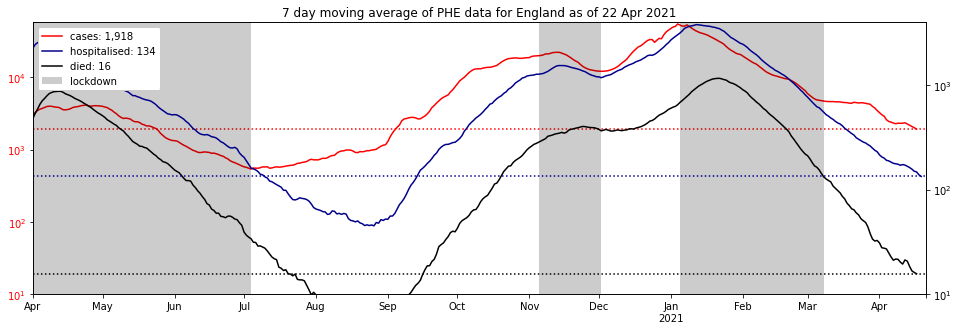

In [5]:
plot_summary(earliest_date='2020-04-01', show_latest='lines', log=True,
             left_series=(s.new_cases_sum,), left_formatter=per1k_formatter,
             right_series=(s.new_admissions_sum, s.new_deaths_sum), right_formatter=per0k_formatter)

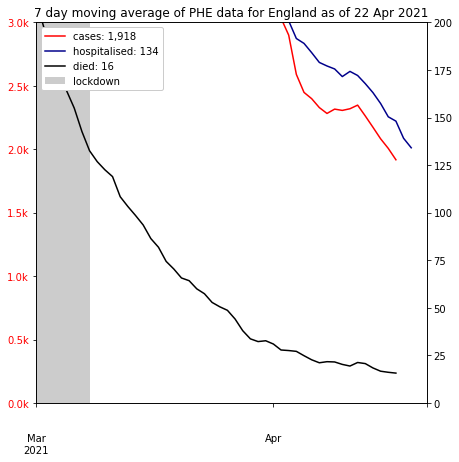

In [6]:
plot_summary(earliest_date='2021-03-01', show_latest=True, figsize=(7, 7),
             left_series=(s.new_cases_sum,), left_formatter=per0k_formatter, left_ymax=3_000,
             right_series=(s.new_admissions_sum, s.new_deaths_sum), right_formatter=per0_formatter, right_ymax=200)

In [7]:
vaccination_changes()

,,Complete (Total),First Dose (Total),Second Dose (Total),Complete (New),First Dose (New),Second Dose (New)
,,,,,,,
England,21 Apr 21,"+9,346,865","+27,891,208","+9,346,865","+339,773","+92,703","+339,773"
Northern Ireland,21 Apr 21,"+311,850","+883,813","+311,850","+13,293","+7,523","+13,293"
Scotland,21 Apr 21,"+898,231","+2,755,175","+898,231","+50,576","+2,600","+50,576"
Wales,21 Apr 21,"+635,655","+1,727,455","+635,655","+13,142","+15,083","+13,142"


,areaName,areaCode,full,any,partial,population,full_pct,partial_pct,none_pct
0,England,E92000001,9346865.0,27891208.0,18544343.0,56286961,16.605738,32.946073,50.448190
1,Northern Ireland,N92000002,311850.0,883813.0,571963.0,1893667,16.468049,30.203990,53.327961
2,Scotland,S92000003,898231.0,2755175.0,1856944.0,5463300,16.441180,33.989420,49.569399
3,Wales,W92000004,635655.0,1727455.0,1091800.0,3152879,20.161097,34.628668,45.210235


'partial: 33,257,651 (49.8%), full: 11,192,601'

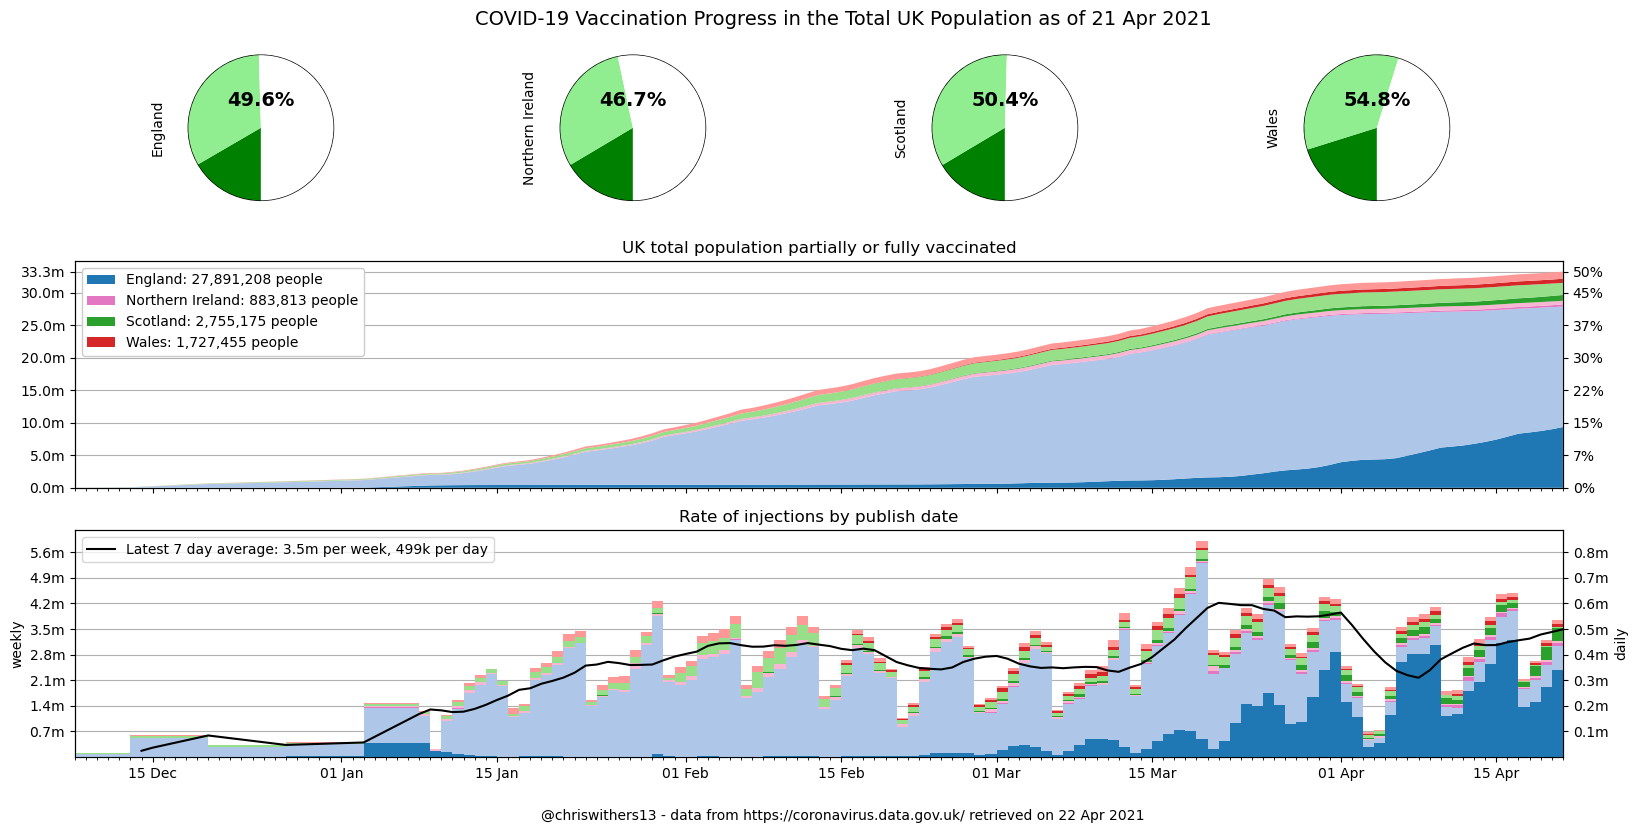

In [8]:
results = vaccination_dashboard(show_partial=True)
partial = results['any'].sum()
population = results['population'].sum()
display(results, f"partial: {partial:,.0f} ({partial/population:.1%}), full: {results['full'].sum():,.0f}")

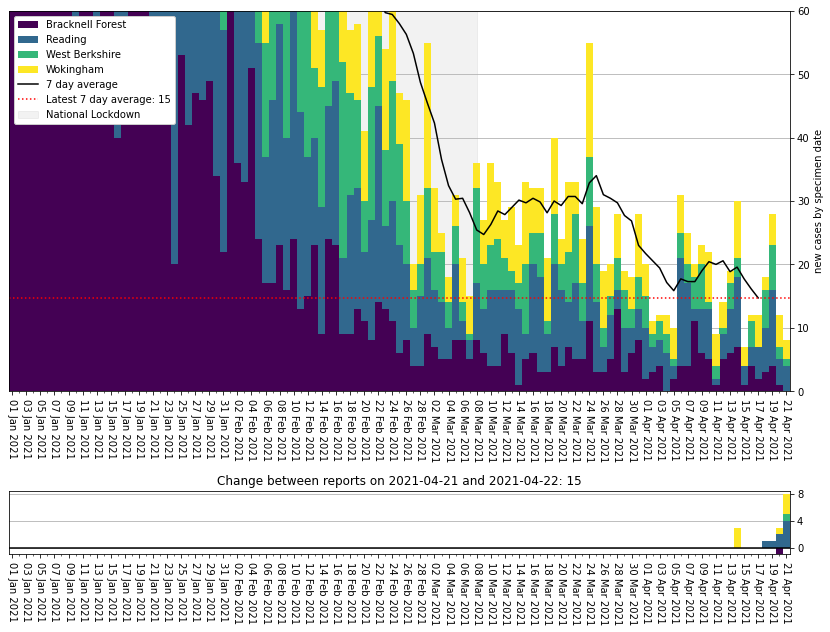

In [9]:
plot_areas(for_date, areas=my_areas, earliest='2021-01-01', ylim=60)

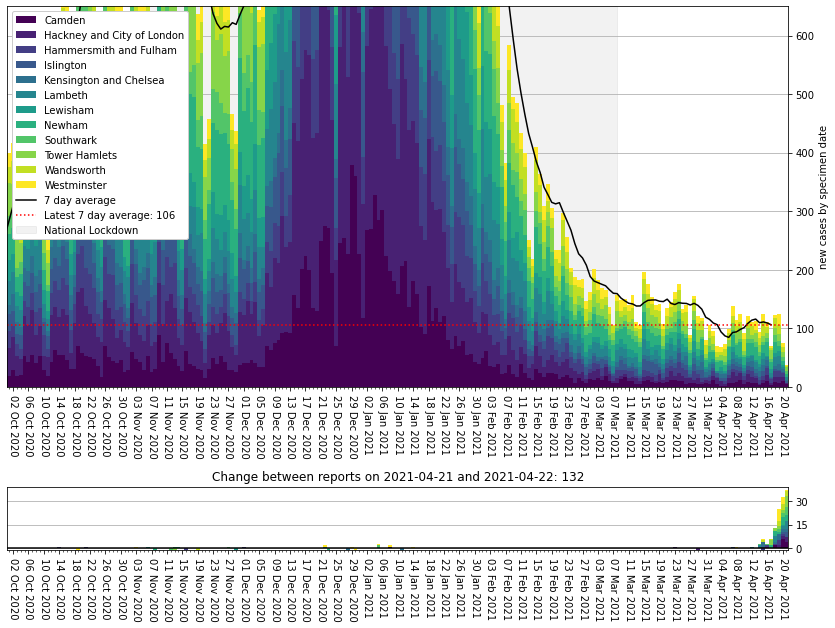

In [10]:
plot_areas(for_date, areas=london_areas, ylim=650)

In [11]:
data = recent_phe_data_summed(for_date)
top_10_cols = [area_name,per100k,new_cases_by_specimen_date, specimen_date]

In [12]:
top_10 = data.sort_values(per100k, ascending=False)[:10][top_10_cols]
top_10

,areaName,"per 100,000 people",newCasesBySpecimenDate,Specimen date
areaCode,,,,
N09000005,Derry City and Strabane,109.727400,166.0,2021-04-21
E07000169,Selby,69.521077,63.0,2021-04-21
S12000005,Clackmannanshire,62.087699,32.0,2021-04-21
E08000017,Doncaster,60.277662,188.0,2021-04-21
E08000034,Kirklees,58.664763,258.0,2021-04-21
N09000009,Mid Ulster,58.574814,87.0,2021-04-21
N09000010,"Newry, Mourne and Down",56.790614,103.0,2021-04-21
S12000050,North Lanarkshire,55.365146,189.0,2021-04-21
E06000032,Luton,52.099957,111.0,2021-04-21


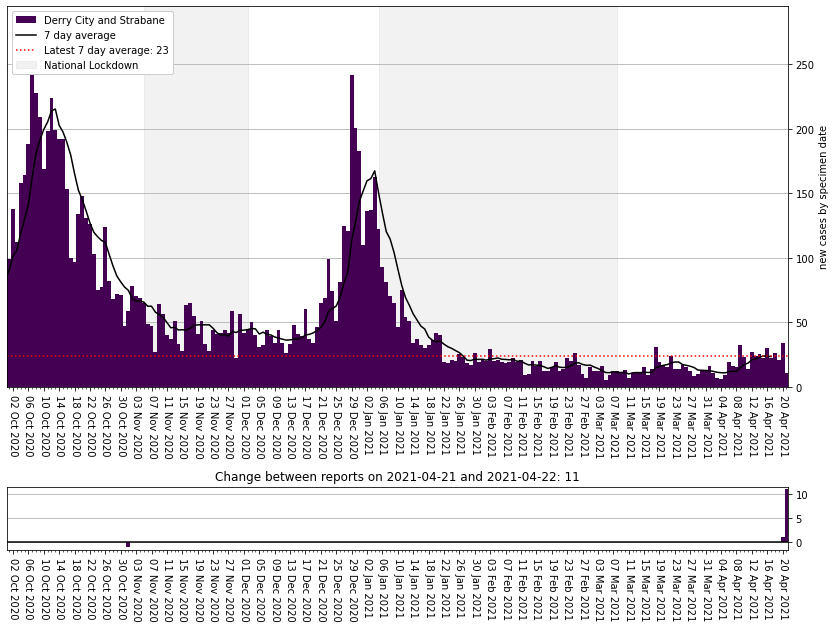

In [13]:
plot_areas(for_date, areas=[top_10.iloc[0].name])

In [14]:
top_10 = data.sort_values(new_cases_by_specimen_date, ascending=False)[:10][top_10_cols]
top_10

,areaName,"per 100,000 people",newCasesBySpecimenDate,Specimen date
areaCode,,,,
E08000035,Leeds,41.858993,332.0,2021-04-21
E08000025,Birmingham,22.683164,259.0,2021-04-21
E08000034,Kirklees,58.664763,258.0,2021-04-21
E08000032,Bradford,47.427081,256.0,2021-04-21
S12000049,Glasgow City,39.013141,247.0,2021-04-21
E08000019,Sheffield,41.719885,244.0,2021-04-21
E08000003,Manchester,41.059368,227.0,2021-04-21
S12000050,North Lanarkshire,55.365146,189.0,2021-04-21
E08000017,Doncaster,60.277662,188.0,2021-04-21


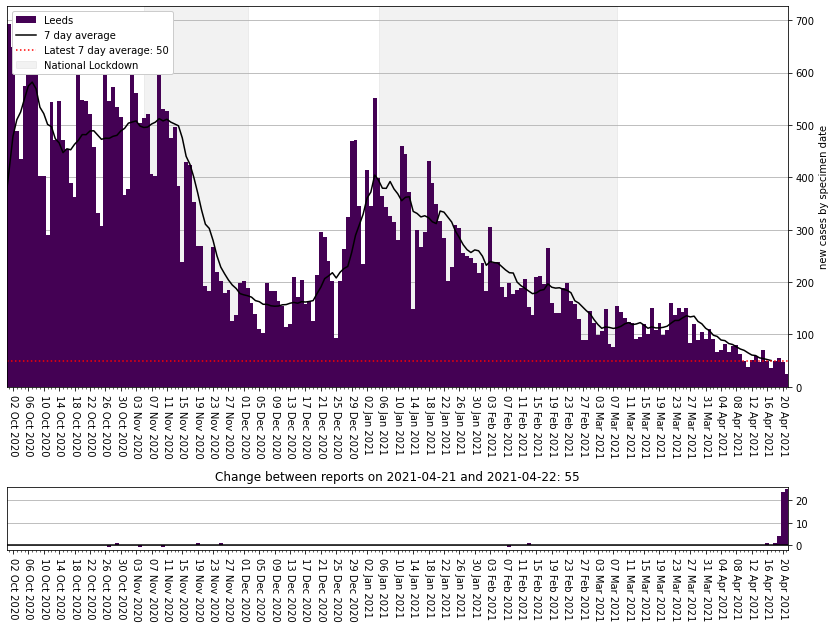

In [15]:
plot_areas(for_date, areas=[top_10.iloc[0].name])

In [16]:
zoe_date, zoe_df = zoe_map_data()
phe_recent_date, phe_recent_geo, phe_recent_title = phe_map_data(for_date)
zoe_max = 0.7
phe_max = 0.13

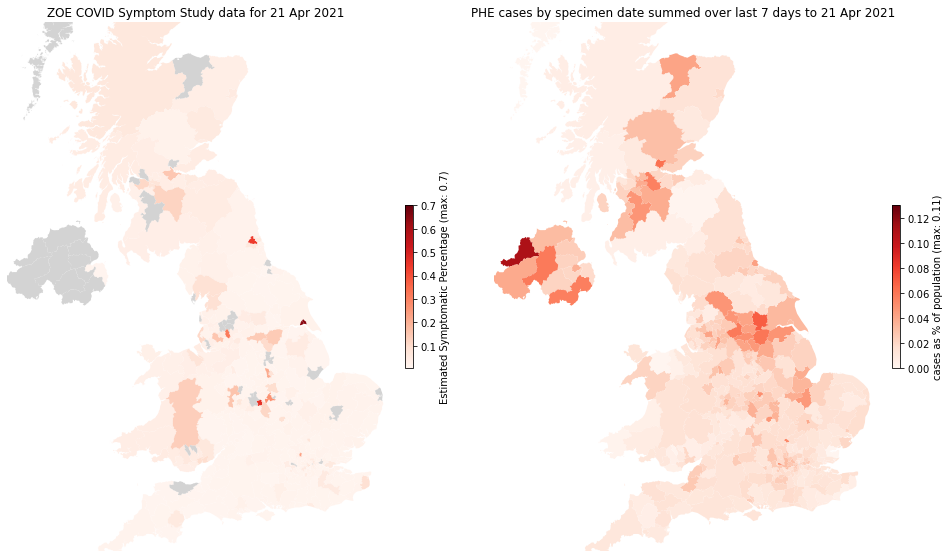

In [17]:
matplotlib_zoe_vs_phe_map(zoe_df, zoe_date, zoe_max, phe_recent_geo, phe_recent_title, phe_max)

In [18]:
bokeh_zoe_vs_phe_map(zoe_df, zoe_date, zoe_max, phe_recent_geo, phe_recent_title, phe_max)

Loading BokehJS ...